In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1617.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1809.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2658.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2127.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2152.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1650.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2804.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2628.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2450.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1434.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1484.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_20244.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1581.jp

In [2]:
import shutil

# Paths
original_dataset_path = '/kaggle/input/garbage-classification-v2/garbage-dataset'
new_dataset_path = '/kaggle/working/garbage-dataset-5-categories'

# Create the new category folders
new_categories = ["Non Biodegradable", "Biodegradable", "Hazardous", "Metal", "Glass"]
for category in new_categories:
    os.makedirs(os.path.join(new_dataset_path, category), exist_ok=True)

# Category mapping to combine classes
category_mapping = {
    "plastic": "Non Biodegradable",
    "metal": "Metal",
    "glass": "Glass",
    "paper": "Biodegradable",
    "shoes": "Biodegradable",
    "battery": "Hazardous",
    "biological": "Biodegradable",
    "cardboard": "Biodegradable",
    "clothes": "Biodegradable",
    "trash": "Biodegradable"
}

# Copy images to the new structure
for original_category, new_category in category_mapping.items():
    original_category_path = os.path.join(original_dataset_path, original_category)
    new_category_path = os.path.join(new_dataset_path, new_category)
    
    for filename in os.listdir(original_category_path):
        file_path = os.path.join(original_category_path, filename)
        shutil.copy(file_path, new_category_path)

print("Dataset reorganization complete.")


Dataset reorganization complete.


In [3]:
from fastai.vision.all import load_learner, vision_learner, resnet50, RandomResizedCrop, ToTensor, aug_transforms
from fastai.metrics import accuracy
from fastai.vision.data import ImageDataLoaders

import warnings
warnings.filterwarnings('ignore')

# Ensure GPU usage
import torch
print("GPU Available:", torch.cuda.is_available())
if not torch.cuda.is_available():
    raise Exception("Please enable GPU in the Kaggle settings.")


GPU Available: True


In [4]:
# Paths
BASE_DIR = "."
DATASET_DIR = "/kaggle/working/garbage-dataset-5-categories"  # Update to your dataset path
MODEL_FILENAME = "waste_classifier_resnet50.pkl"

In [5]:
# Load data
data = ImageDataLoaders.from_folder(
    DATASET_DIR,
    train='train',
    shuffle=True,
    valid_pct=0.1,  # 10% for validation
    item_tfms=[ToTensor, RandomResizedCrop(224, min_scale=0.35)],
    batch_tfms=aug_transforms(flip_vert=True, batch=True, max_rotate=30.0),
)

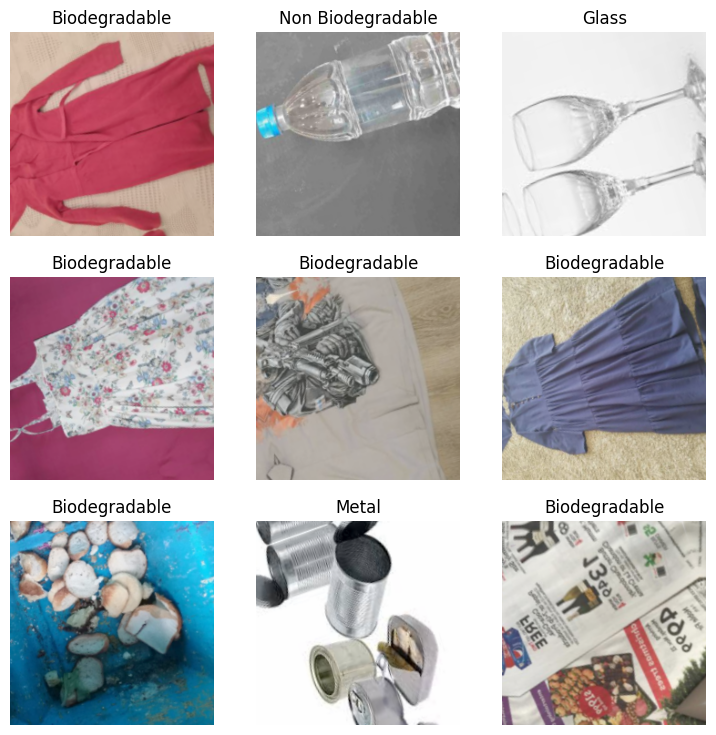

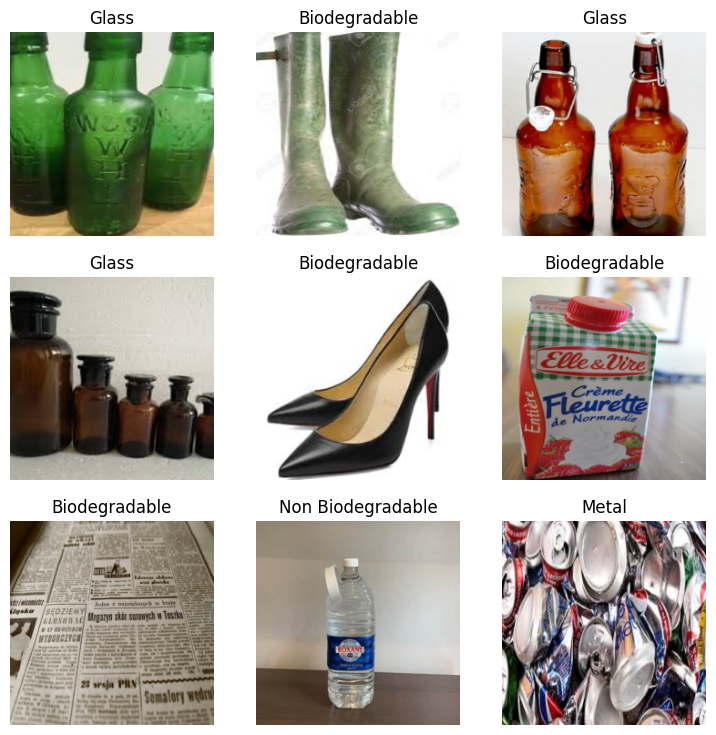

In [6]:
# Display batches (optional)
data.train.show_batch()
data.valid.show_batch()

In [7]:
# Check vocabulary (classes)
print("Classes:", data.vocab)

Classes: ['Biodegradable', 'Glass', 'Hazardous', 'Metal', 'Non Biodegradable']


In [8]:
# Define and train the model
learn = vision_learner(data, resnet50, metrics=accuracy)
learn.fine_tune(20)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 220MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.452553,0.263104,0.917510,01:17


epoch,train_loss,valid_loss,accuracy,time
0,0.262284,0.134496,0.957996,01:38
1,0.205197,0.099077,0.965587,01:38
2,0.157935,0.086951,0.970142,01:38
3,0.140328,0.087870,0.971154,01:38
4,0.137023,0.084597,0.970648,01:38
5,0.111772,0.078963,0.974696,01:38
6,0.102952,0.065387,0.977227,01:38
7,0.086932,0.076009,0.975708,01:39
8,0.071028,0.061240,0.978745,01:38
9,0.064350,0.061138,0.984312,01:38


In [9]:
learn.export('waste_classifier_resnet50.pkl')

In [7]:
# Load the exported fastai learner and define a predictor
%pip install fastai
from fastai.vision.all import load_learner, PILImage
import torch
import os

# Adjust path if needed (relative to this notebook's folder)
MODEL_PATH = os.path.join('.', 'waste_classifier_resnet50.pkl')

if not os.path.exists(MODEL_PATH):
    # Fallback: try the workspace file if running locally
    alt_path = os.path.join(os.getcwd(), 'waste_classifier_resnet50.pkl')
    if os.path.exists(alt_path):
        MODEL_PATH = alt_path
    else:
        raise FileNotFoundError(f"Model file not found at {MODEL_PATH}. Place 'waste_classifier_resnet50.pkl' next to this notebook.")

learn = load_learner(MODEL_PATH, cpu=not torch.cuda.is_available())
print('Loaded model. Classes:', learn.dls.vocab)


  Using cached torch-2.8.0-cp313-cp313-win_amd64.whl.metadata (30 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)


c:\Users\skarthi\project zoom meeting\sign-transulator-\python tets\.venv\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


RuntimeError: Loading model fname='.\\waste_classifier_resnet50.pkl', attempted to import from `fastcore.dispatch` and/or `fastcore.transform` which are deprecated in `fastai>=2.8.0`.
Downgrade to `fastai<2.8.0` if you want to load this model.

In [3]:
# Define category mapping to binary labels and a predict function
# Original classes expected: ['Biodegradable', 'Glass', 'Hazardous', 'Metal', 'Non Biodegradable']
BIODEGRADABLE_SET = {'Biodegradable'}
NON_BIODEGRADABLE_SET = {'Non Biodegradable', 'Glass', 'Metal', 'Hazardous'}

id_to_binary = {0: 'Biodegradable', 1: 'Non Biodegradable'}

# Map predicted class name to binary class name
def map_to_binary(class_name: str) -> str:
    if class_name in BIODEGRADABLE_SET:
        return 'Biodegradable'
    return 'Non Biodegradable'

# End-to-end predictor for a PIL image path or PIL image
def predict_binary(img_input):
    # Supports path str or PILImage
    if isinstance(img_input, str):
        img = PILImage.create(img_input)
    else:
        img = img_input
    pred, pred_idx, probs = learn.predict(img)
    binary_label = map_to_binary(str(pred))

    # Also aggregate probability mass across fine classes for the binary groups
    vocab = list(map(str, learn.dls.vocab))
    prob_by_class = {vocab[i]: float(probs[i]) for i in range(len(vocab))}
    prob_bio = sum(prob_by_class.get(c, 0.0) for c in BIODEGRADABLE_SET)
    prob_non = sum(prob_by_class.get(c, 0.0) for c in NON_BIODEGRADABLE_SET)

    return {
        'fine_label': str(pred),
        'binary_label': binary_label,
        'probabilities': {
            'Biodegradable': prob_bio,
            'Non Biodegradable': prob_non
        },
        'per_class_probs': prob_by_class
    }

print('Binary mapping ready. Example mapping:', map_to_binary('Glass'))


Binary mapping ready. Example mapping: Non Biodegradable


In [10]:
# Simple Gradio UI for uploading an image and getting a binary prediction
# %pip install gradio
%pip install Pillow
import gradio as gr

example_text = "Upload a waste image to classify as Biodegradable or Non Biodegradable."

def gradio_predict(image: 'PIL.Image.Image'):
    result = predict_binary(image)
    label = result['binary_label']
    prob_bio = result['probabilities']['Biodegradable']
    prob_non = result['probabilities']['Non Biodegradable']
    explanation = f"Fine class: {result['fine_label']} | Biodegradable: {prob_bio:.3f} | Non Biodegradable: {prob_non:.3f}"
    return label, explanation

with gr.Blocks() as demo:
    gr.Markdown(f"# Waste Classifier\n{example_text}")
    with gr.Row():
        with gr.Column():
            img = gr.Image(type='pil', label='Upload image')
            btn = gr.Button('Predict')
        with gr.Column():
            out_label = gr.Label(label='Binary Prediction')
            out_text = gr.Textbox(label='Details', lines=2)
    btn.click(fn=gradio_predict, inputs=img, outputs=[out_label, out_text])

print('Launch the app with demo.launch() in notebook or demo.queue().launch() for concurrency.')


Note: you may need to restart the kernel to use updated packages.


NameError: name 'PIL' is not defined